# 1. 데이터셋 확인

In [35]:
# 라이브러리 불러오기

import numpy as np 
import pandas as pd # 테이블화 된 데이터를 다루는 데 가장 최적화 되어있는 라이브러리.
import matplotlib.pyplot as plt 
import seaborn as sns

# matplotlib 스타일 중, 'seaborn' 스타일 사용
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 데이터셋의 null 데이터를 쉽게 보여주는 라이브러리
import missingno as msno 

# warnings을 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 그리면 노트북에 바로바로 보여지게하기
%matplotlib inline

In [2]:
#데이터 불러오기
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [3]:
# 데이터 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 형태 
df_train.shape # 892행 12열

(891, 12)

In [5]:
# 각 feature가 가진 통계적 수치를 알려줌
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


이를 보면, passengerID 숫자와는 다른, 즉 null data가 존재하는 열이 있다는 것을 알 수 있음.

### 1.1 Null data check

In [7]:
# columns를 return 해줘
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# for문으로 이용하여 각 열의 NaN 비율 구하기
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    # :> 오른쪽 정렬 (< 하면 왼쪽정렬)
    # (df_train[col].isnull().sum() / df_train[col].shape[0])) 
        # --> 열에서 null 갯수를 다 더해서, 행의 수로 나눈다.

columns: PassengerId	 Percent of NaN value: 0.00%
columns:   Survived	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 19.87%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.00%
columns:      Cabin	 Percent of NaN value: 77.10%
columns:   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 20.57%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.24%
columns:      Cabin	 Percent of NaN value: 78.23%
columns:   Embarked	 Percent of NaN value: 0.00%


Tran, Test 데이터에서 'Age', 'Cabin', 'Embarked'(Train에서만) 에 null data가 존재하는 것을 볼 수 있다.

<AxesSubplot:>

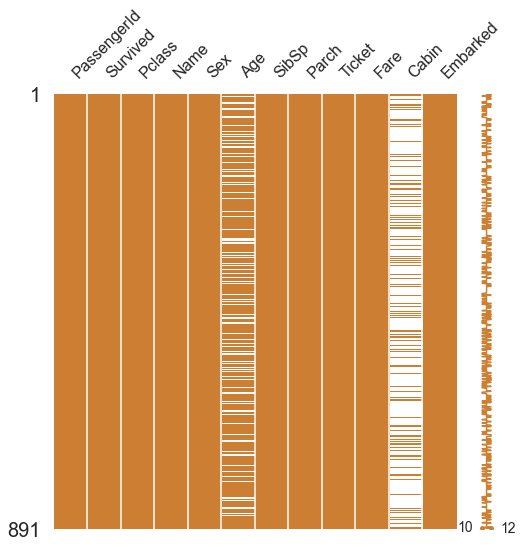

In [10]:
# 매트릭스 형태로 만들어 null 파악하기
# msno 라이브러리를 통해 null data의 존재를 쉽게 볼 수 있음.
# df에 iloc([행, 열])를 준다. [:, :]을 줬으니 그냥 다 가지고 오겠다는 의미.
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [11]:
# 빈칸이 null이다. 
# 어느 위치에 null데이터가 존재하는지, 분포를 알기에 좋음

<AxesSubplot:>

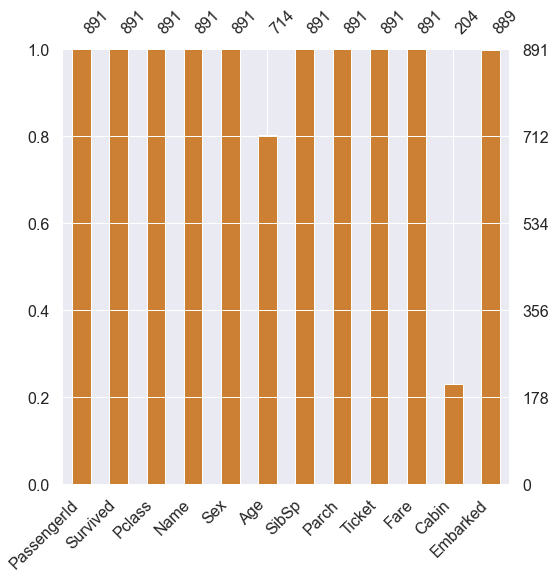

In [12]:
# bar 그래프로 null 파악하기
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [13]:
# 몇개 있는지, 얼마나 있는지 파악하기 좋음

### 1.2 Target label 확인

target label이 얼마나 밸런스있게 데이터셋에 있느냐, 밸러스 있지 않느냐에 따라 모델을 평가하는 방식, 모델을 세우는 방식이 많이 달라진다.

따라서 항상 우리가 목적으로 하는 target label이 어떠한 분포를 가졌는지 꼭 확인해야함

지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라진다.

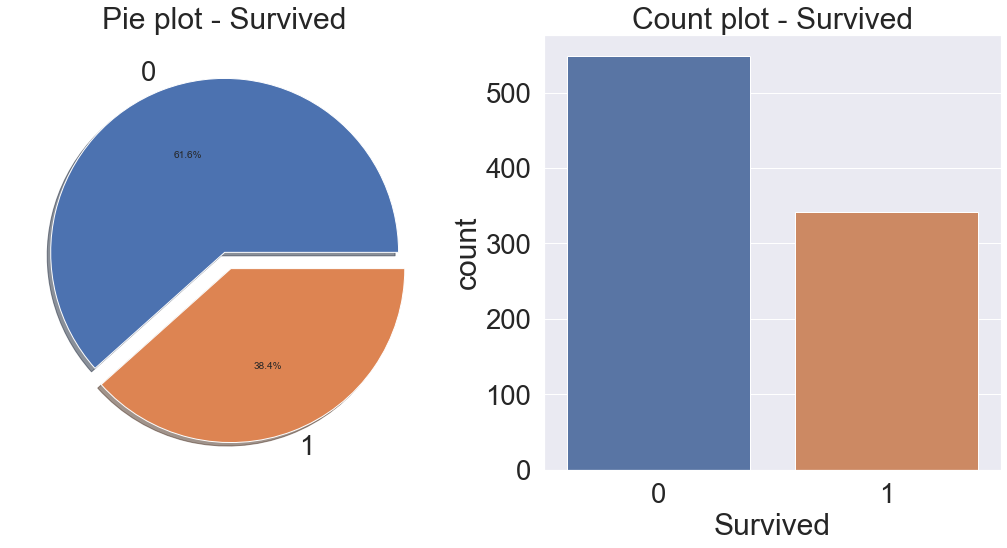

In [14]:
# 도화지를 준비하는과정. sub는 부분부분을 이야기하는거니까 ! 
f, ax = plt.subplots(1, 2, figsize=(18, 8)) 
    # 하나의 행에 두개의 파트로 나눠진 도화지
    # subplots(row, column, figsize=(가로, 세로) )

    
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
    # value_counts : 각 label의 갯수를 반환
    # 시리즈들은 .plot() 을 가지고 있다. 파이로 그리고싶으면 뒤에 붙이면됨.
    # explode : 각 파이의 간격
    # autopct : 파이에 있는 퍼센트를 나타내주는것
    # ax : 도화지 어떤 부분에 그릴래 (여기선 첫번째)
ax[0].set_title('Pie plot - Survived') # 제목
ax[0].set_ylabel('') # y축 (여기선 레이블 없애겠다는 의미)

# countplot : 말그대로 count를 해주는 plot
sns.countplot('Survived', data=df_train, ax=ax[1])
    # countplot('열이름', data=데이터)
ax[1].set_title('Count plot - Survived')
plt.show()

38.4%가 살아남았다. target label의 분포가 제법 균일한 것을 알 수 있다. 

* 불균일한 경우 -> 100중 1이 99, 0이 1개인경우에는 만약 모델이 모든것을 1이라고 해도 정확도가 99%가 나온다. 그럼 0을 찾는 문제에서는 이 모델은 원하는 결과를 줄 수 없게됨.

# 2. Exploratory data analysis

### 2.1 Pclass

In [15]:
# 배의 등급을 나타낸다.
# ordinal, 서수형 데이터이다. 카테고리이면서 순서가 있는 데이터타입.

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
    # 1. 'Pclass'와 'Survived'를 가져와
    # 2. groupby 묶는다. 여기서는 'Pclass'로.
        # as_index : Pclass를 index로 두느냐
    # 3. 객체는 많은 메소드를 가지고 있다. 여기서는 count로 몇개있는지 세어줘. 
        # (각 class에 몇명있는지) (sum일 경우에는 생존자의 총합을 준다.)

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
# pandas의 crosstab으로 좀 더 수월하게 계산하기 

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
    # margins : All이 있거나 없거나
    # background_gradient : 백그라운드색을바꾸겠다_기울어지는형태에따라(cmap(colormap)='')
        # 값에 따라 색의 간격을 줘서 보기 편하도록 만들기
        # color map scheme 검색하면 여러가지 나온다 ! 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

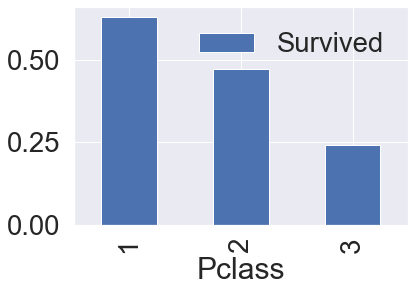

In [18]:
# mean을 이용하여 생존률 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
    # sort_values : 순서대로 정렬 (어떻게 할까 --> by =''주면 됨.)
        # ascending=False 하면 반대로됨 (여기서는 내림차순으로)
    # 시리즈 형태니까 plot 그리기 가능 ~!

Pclass가 높을 수록 생존률이 높은 것을 확인할 수 있다.

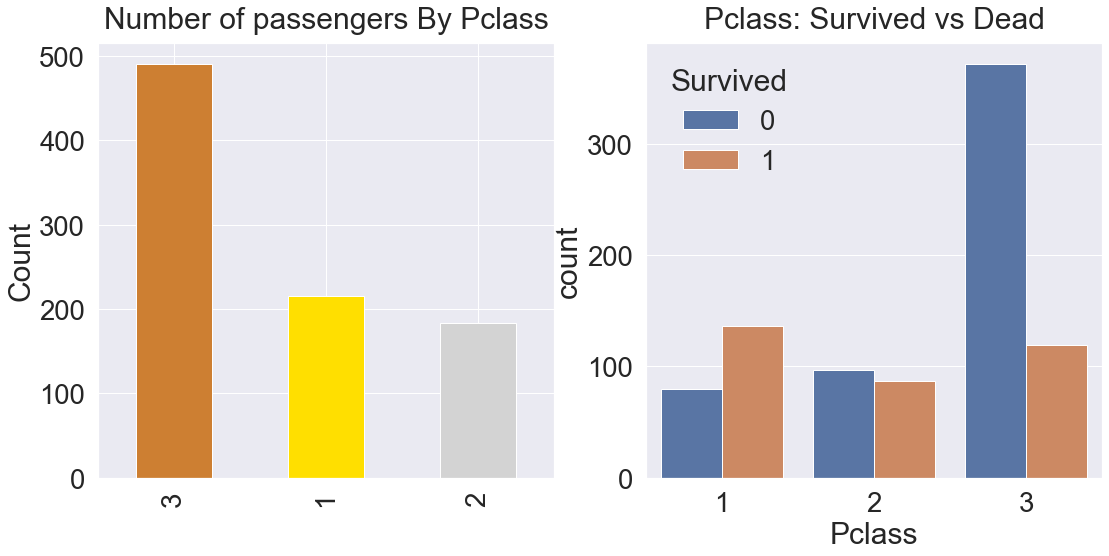

In [19]:
# 도화지 준비
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 그리기
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# seaborn의 countplot을 이용하여 특정 label에 따른 개수 확인해보기
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) # hue : 색을 나눠서 구분하여 보여주기
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

Pclass의 total count는 3 class가 가장 많고 그다음 1, 2이지만,

생존확률만 봤을때는 1 class 일 때 생존을 많이 했다고 결론 낼 수 있다.

따라서 생존에 Pcalss가 큰 영향을 미친다고 생각해볼 수 있다. 또한 나중에 모델을 세울 때 이 feature을 사용하는 것이 좋을 것이라 판단할 수 있다.

### 2.2 Sex

성별에 따른 생존률

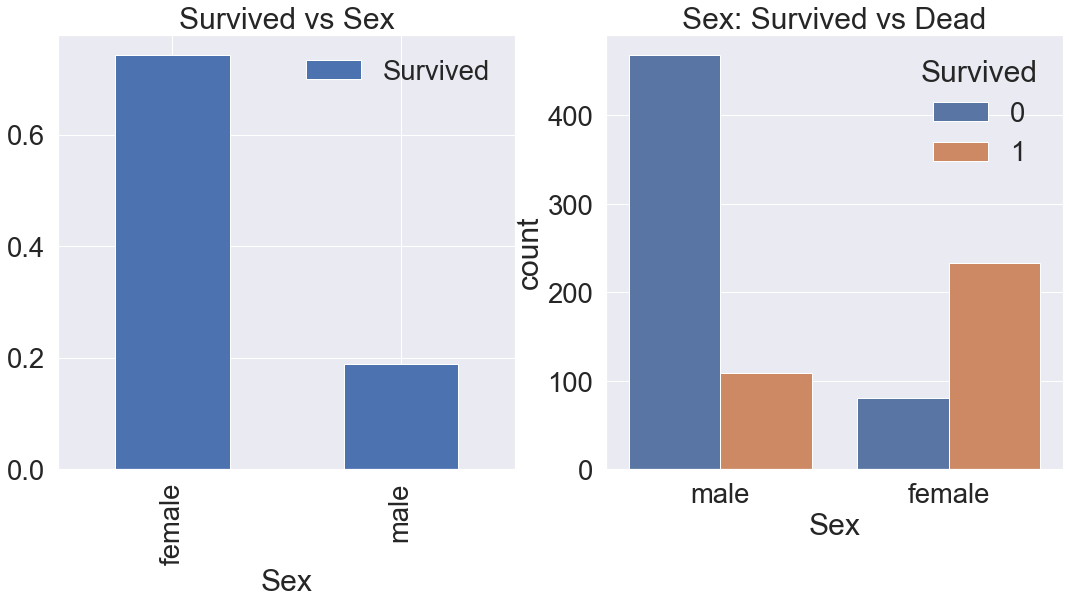

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여성의 생존확률이 높은 것을 알 수 있다.

In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Sex도 예측 모델이 쓰일 중요한 feature임을 알 수 있다.

### 2.3 Both Sex and Pclass

Sex, Pclass 두가지에 관한 생존률 변화

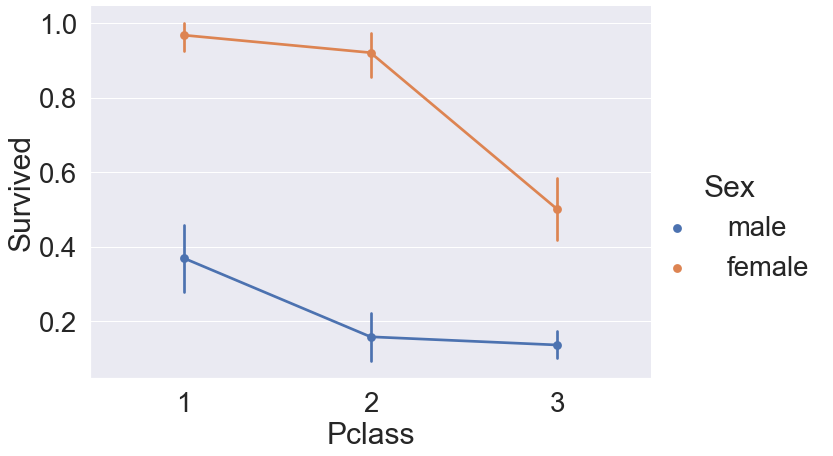

In [23]:
# seaborn의 factorplot을 이용하여 3차원 그래프 그리기
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
    # sns.factorplot(x축, y축, hue=색으로, data=데이터, size=사이즈, aspect=각 면의 가로세로 비율)

* 모든 클래스에서 여성이 살 확률이 남성보다 높은 것을 알 수 있다.
* 성별 상관없이 클래스가 높을 수록 살 확률이 높다.

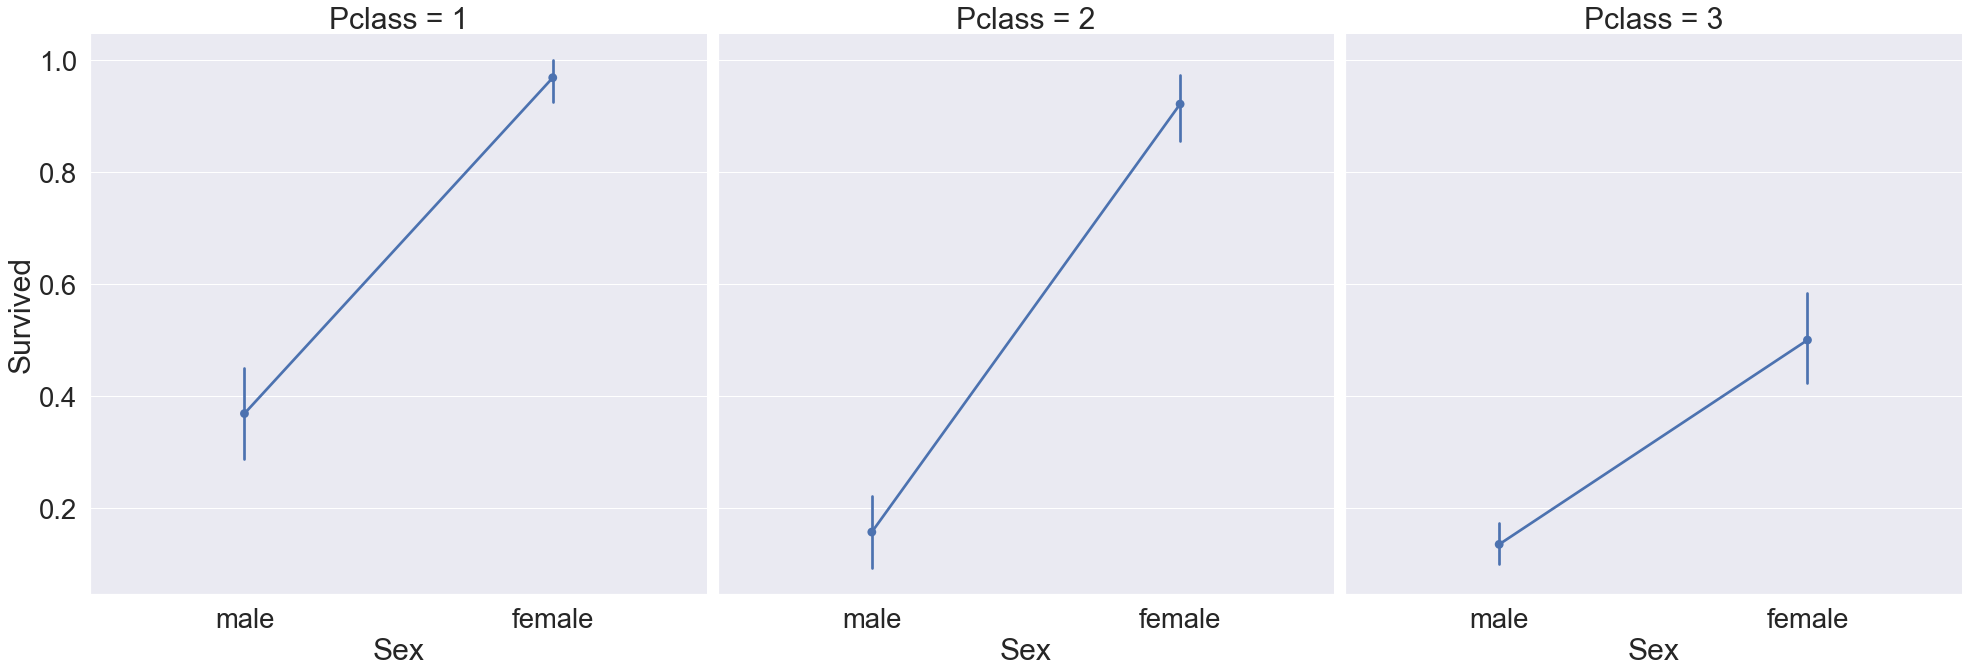

In [24]:
# factorplot을 다르게 느껴보자
# 색으로 말고 column으로 !
# 보는 뱡향이 바뀐다 ! 
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

### 2.4 Age

In [27]:
# Age 특징 살펴보기

print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [28]:
foo=df_train['Age']

In [30]:
foo.all()

True

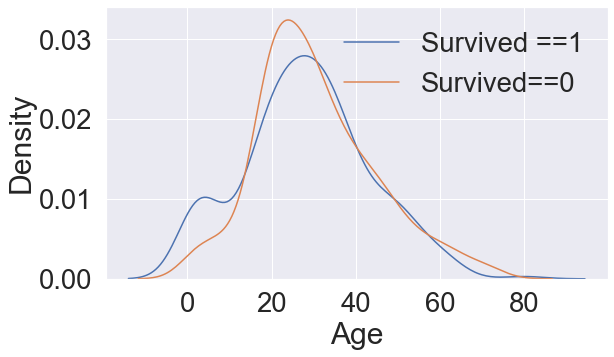

In [32]:
fig,ax=plt.subplots(1, 1, figsize=(9,5))

# kdeplot : Kernel Distribution Estimation Plot 커널밀도추정 (히스토그램을 스무스하게 그린거)
# boolean을 이용하여 추출해내기 
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax) # 생존한 사람만의 나이 열
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax) # 사망한 사람만의 나이 열

plt.legend(['Survived ==1', 'Survived==0'])
plt.show()

In [ ]:
# 도화지를 준비하는 여러가지 방법 (다 똑같음)

# f = plt.figure(figsize=(10, 10)) --> 이건 axis 가지지 않은 상태

# f, ax = plt.subplots(1, 1, figzsize=(10, 10) --> 축 반환

# plt.figure(figsize=(10,10)) --> axis랑 figure 반환 안하고 바로 plt에

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

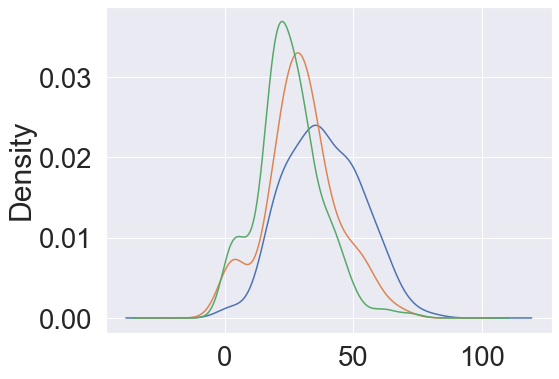

In [38]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde') #위의 생존별 나이 뽑아내서 그래프 그리는 방법이랑 똑같다.
df_train['Age'][df_train['Pclass']==2].plot(kind='kde') # hist로 할 시, 겹쳐서 안보이기때문에 kde좋음
df_train['Age'][df_train['Pclass']==3].plot(kind='kde') # kde는 추정식이기 때문에 나이에서 -가 나올 수 있다.

# plt로 하면 메소드가 xlable이고, axis라 하면 ax.set_xlable이다. 
# 이렇게 메소드 이름 다르니 주의 !!
plt.xlable('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

클래스가 높을수록 나이가 많은 것을 알 수 있다.

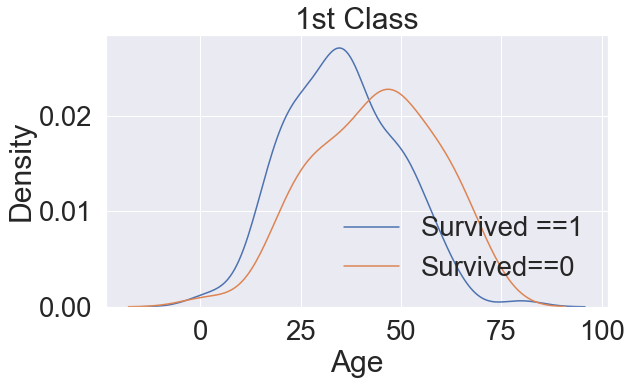

In [43]:
# 클래스별로 생존확률의 분포 구하기
# 1st Class

fig,ax=plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1) ]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==1) ]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Class')
plt.show()

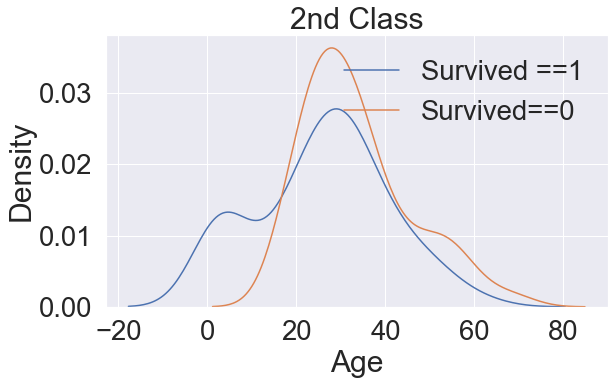

In [45]:
# 클래스별로 생존확률의 분포 구하기
# 2nd Class

fig,ax=plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2) ]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2) ]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd Class')
plt.show()

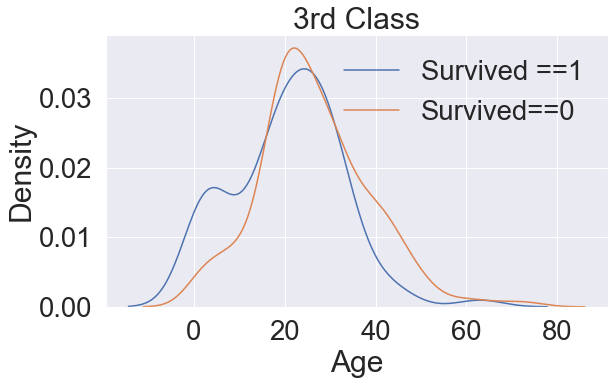

In [46]:
# 클래스별로 생존확률의 분포 구하기
# 3rd Class

fig,ax=plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3) ]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3) ]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd Class')
plt.show()

세 그래프를 보면 젊은 사람일수록 생존 확률이 높다.

In [47]:
# 나이대가 변하면서 생존률이 어떻게 되는지 보기
# 나이 범위를 점점 넓혀가면서 생존률이 어떻게 되는지 보자

change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

In [48]:
# 풀어서 보기

# df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived'])

# 1. df_train에서 i보다 작은 나이의 아이들을 뽑고
# 2. 그 중 'Survived' 열만 추출하여 더한다. --> 몇명 생존했는지 알 수 있음
# 3. 뒤의 len 열은 i보다 작은 나이의 아이들의 전체 수를 의미함

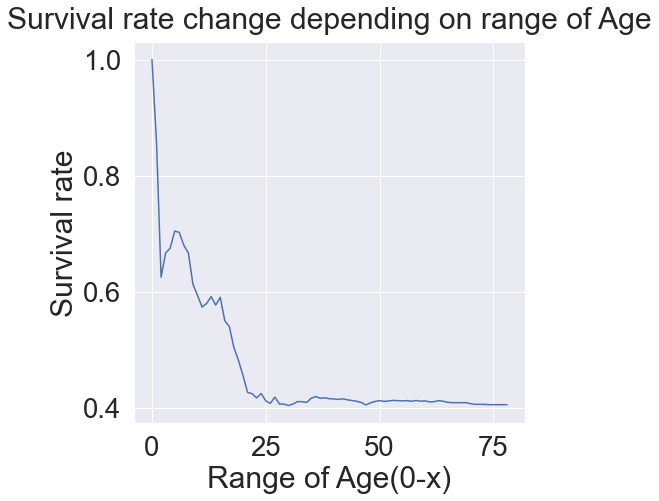

In [49]:
plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02) #y=1.02는 타이틀의 위치를 옮겨주는거
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

이처럼, 나이가 어릴수록 생존확률이 높다는 것을 알 수 있다.